<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Universidad_Industrial_de_Santander_logo.svg/2560px-Universidad_Industrial_de_Santander_logo.svg.png" width=180 title="Taller#1 Estadística Descriptiva">





#**Proyecto: Análisis y Predicción del Rendimiento Académico en Estudiantes Universitarios a partir de Patrones de Sueño y Habitos**








**Estudiante:** Juan David Lopez Ruiz

**Codigo:** 2180645



**Profesor:** Santiago Gomez


**IA1 || Grupo C1**


**Escuela de Ingeniería de Sistemas e Informática**


In [ ]:
#@title **Montar Drive** { display-mode: "form" }
import os
from google.colab import drive

Nombre_Carpeta = "Proyecto_IA1" #@param {type:"string"}
path = "/content/drive/My Drive/" + Nombre_Carpeta
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Proyecto_IA1


In [ ]:

#@title **Cargar Librerias** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
sns.set_theme()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
print("Librerias Cargadas")

Librerias Cargadas


In [ ]:
#@title **Montar Dataset** { display-mode: "form" }

df = pd.read_csv("student_habits_performance.csv")  # reemplazar con el nombre real del archivo



In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:


#@title **Variable Objetivo** { display-mode: "form" }
# --- 1. CREACIÓN DE LA VARIABLE OBJETIVO MULTICLASE ---
# Definimos los umbrales usando percentiles (33% y 66%) para crear clases balanceadas
p33 = df['exam_score'].quantile(0.33)
p66 = df['exam_score'].quantile(0.66)

def classify_performance(score):
    if score <= p33:
        return 0  # Bajo rendimiento
    elif score <= p66:
        return 1  # Medio rendimiento
    else:
        return 2  # Alto rendimiento

df['performance_level'] = df['exam_score'].apply(classify_performance)


In [ ]:
#@title **Revisión de Tipos de Datos y Valores Nulos** { display-mode: "form" }


# Información detallada del DataFrame
print("Información General y Tipos de Datos:")
df.info()

# Conteo de valores nulos
print("\nConteo de Valores Nulos por Columna:")
print(df.isnull().sum())

print("\nValores Únicos en Variables Categóricas:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"- {col}: {df[col].nunique()} categorías ({df[col].unique()})")



Información General y Tipos de Datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_qu


### Visualizaciones EDA


/tmp/ipython-input-1557968156.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='performance_level', y='study_hours_per_day', data=df, palette='viridis')
/tmp/ipython-input-1557968156.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='performance_level', y='social_media_hours', data=df, palette='viridis')
/tmp/ipython-input-1557968156.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='performance_level', y='sleep_hours', data=df, palette='viridis')


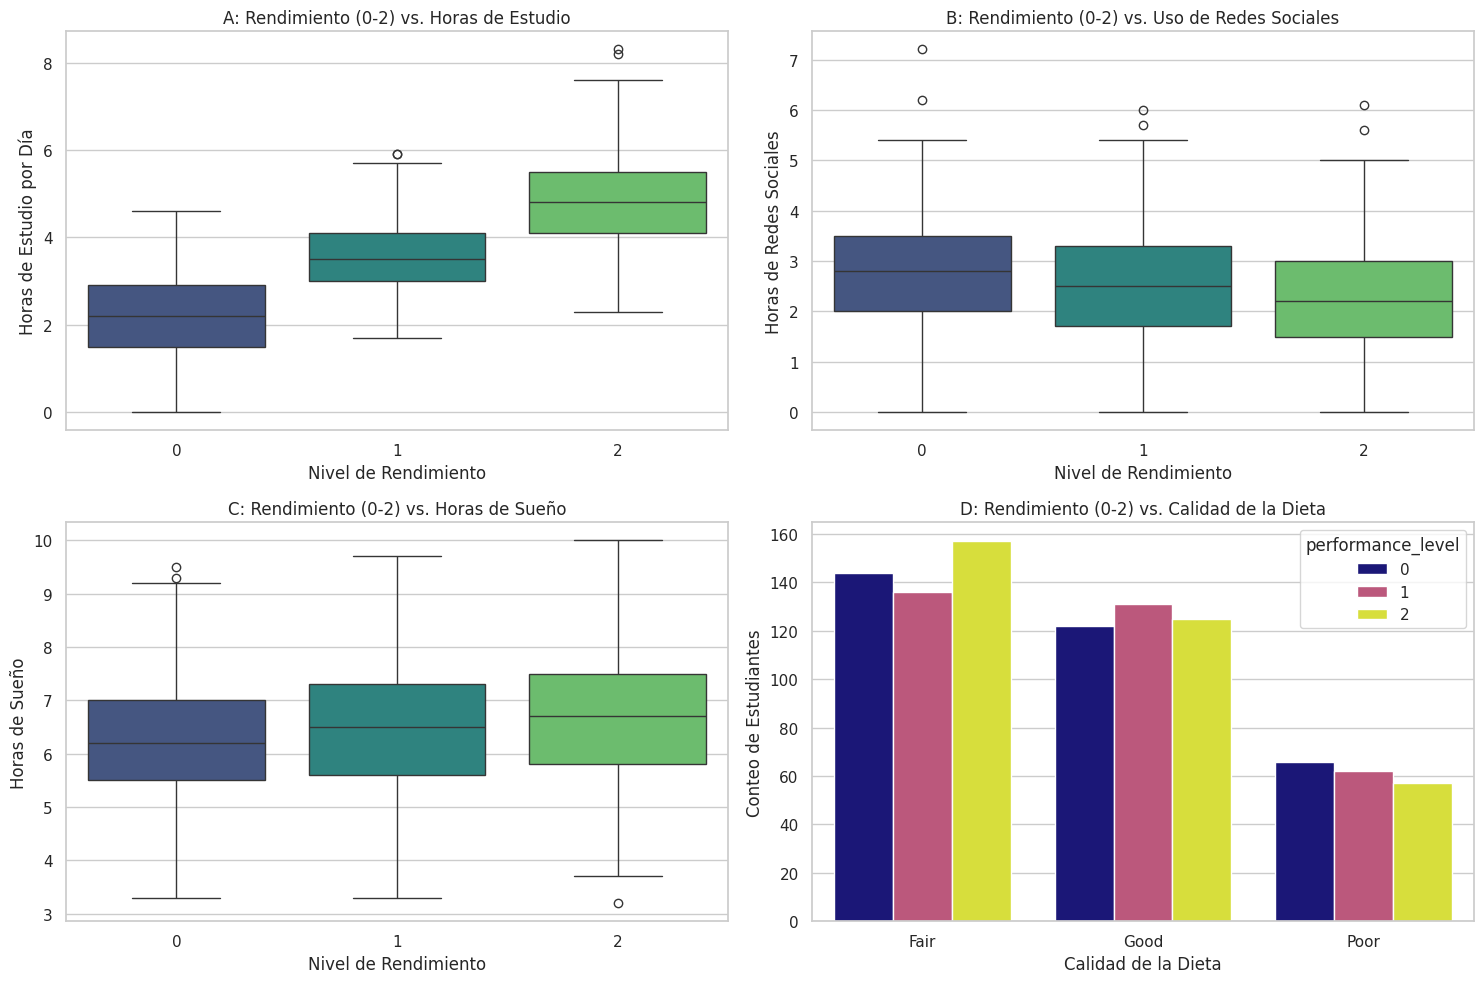

In [ ]:
#@title **Visualizaciones EDA Relevantes** { display-mode: "form" }
# ---  ---
print("\n### Visualizaciones EDA")
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Gráfico A: Rendimiento vs. Horas de Estudio
plt.subplot(2, 2, 1)
sns.boxplot(x='performance_level', y='study_hours_per_day', data=df, palette='viridis')
plt.title('A: Rendimiento (0-2) vs. Horas de Estudio')
plt.xlabel('Nivel de Rendimiento')
plt.ylabel('Horas de Estudio por Día')

# Gráfico B: Rendimiento vs. Uso de Redes Sociales
plt.subplot(2, 2, 2)
sns.boxplot(x='performance_level', y='social_media_hours', data=df, palette='viridis')
plt.title('B: Rendimiento (0-2) vs. Uso de Redes Sociales')
plt.xlabel('Nivel de Rendimiento')
plt.ylabel('Horas de Redes Sociales')

# Gráfico C: Rendimiento vs. Horas de Sueño
plt.subplot(2, 2, 3)
sns.boxplot(x='performance_level', y='sleep_hours', data=df, palette='viridis')
plt.title('C: Rendimiento (0-2) vs. Horas de Sueño')
plt.xlabel('Nivel de Rendimiento')
plt.ylabel('Horas de Sueño')

# Gráfico D: Rendimiento vs. Calidad de la Dieta
plt.subplot(2, 2, 4)
sns.countplot(x='diet_quality', hue='performance_level', data=df, palette='plasma')
plt.title('D: Rendimiento (0-2) vs. Calidad de la Dieta')
plt.xlabel('Calidad de la Dieta')
plt.ylabel('Conteo de Estudiantes')

plt.tight_layout()
plt.show()

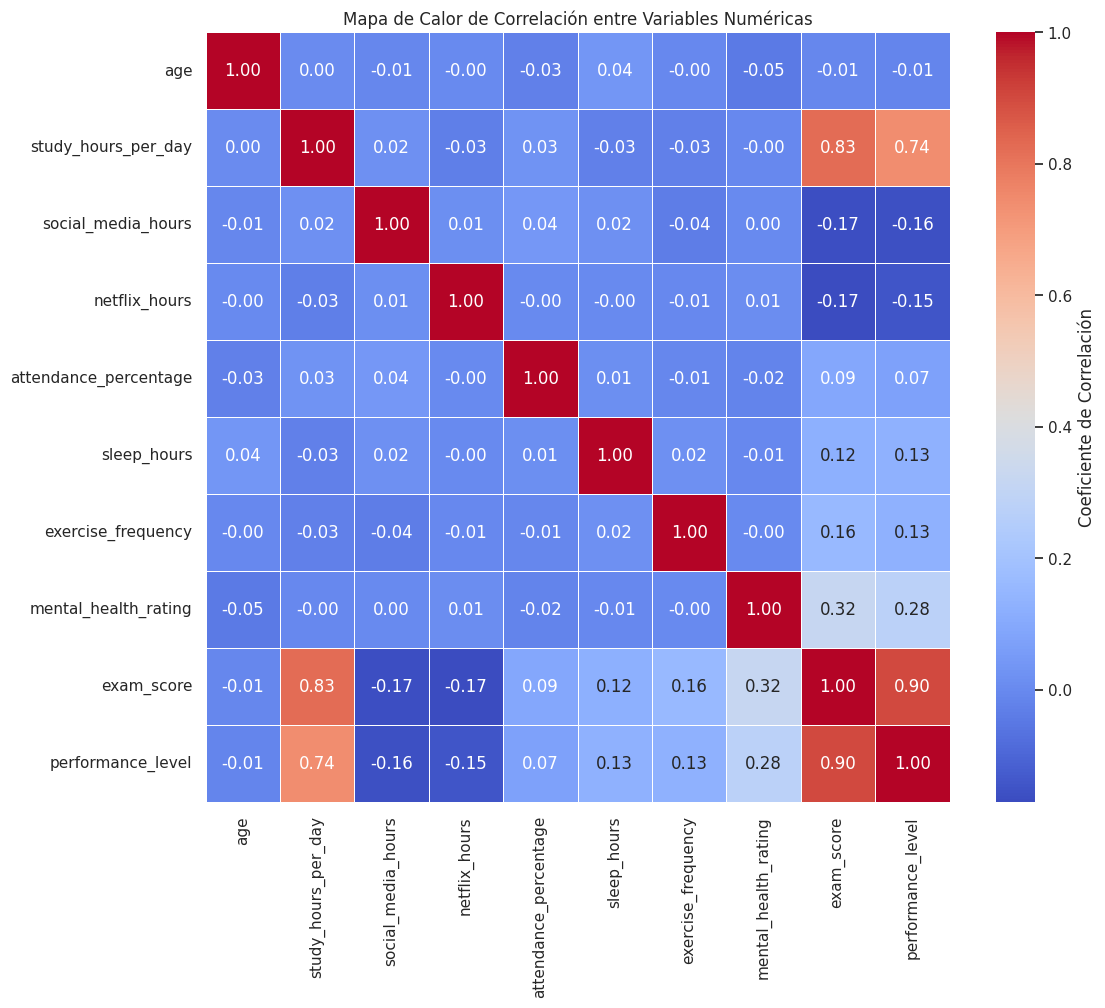


### Hallazgos del Heatmap:
* La correlación más alta se observa entre **'exam_score'** y **'study_hours_per_day'** (positiva).
* Se pueden identificar posibles problemas de multicolinealidad si hay variables predictoras muy correlacionadas entre sí (valores > 0.8), aunque no es crítico para Random Forest.


In [ ]:

#@title **Análisis de Correlación** { display-mode: "form" }
# Calcular la matriz de correlación solo para variables numéricas (incluyendo 'exam_score')
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Coeficiente de Correlación'}
)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

print("\n### Hallazgos del Heatmap:")
print("* La correlación más alta se observa entre **'exam_score'** y **'study_hours_per_day'** (positiva).")
print("* Se pueden identificar posibles problemas de multicolinealidad si hay variables predictoras muy correlacionadas entre sí (valores > 0.8), aunque no es crítico para Random Forest.")

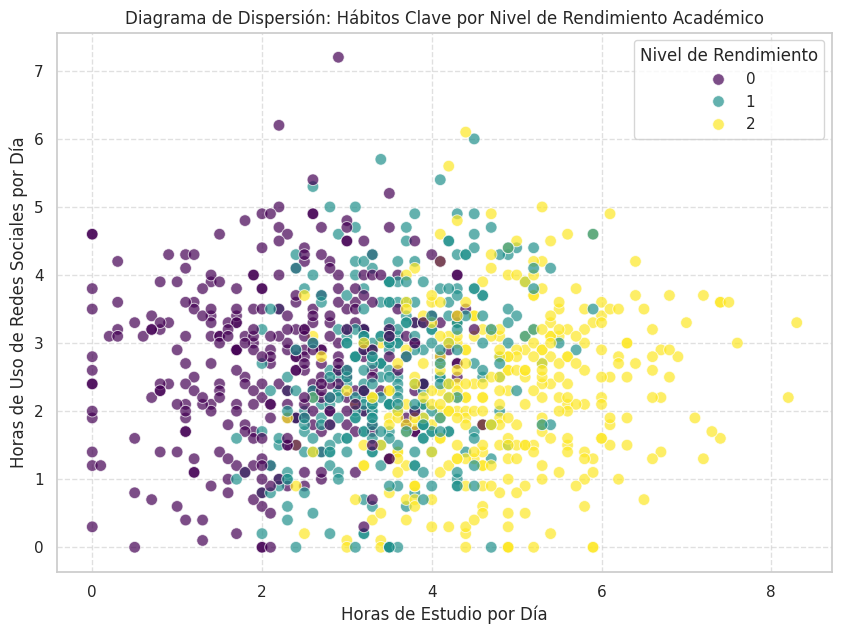


## 🔎 Análisis del Diagrama de Dispersión
* El gráfico ilustra la **separación espacial** de las clases basada en dos variables clave.
* **Clase Alto (2):** Se concentra en la esquina **superior izquierda** (Altas horas de estudio y Bajas horas de redes sociales).
* **Clase Bajo (0):** Se concentra en la esquina **inferior derecha** (Bajas horas de estudio y Altas horas de redes sociales).
* **Clase Medio (1):** Se ubica principalmente en la **zona central**, sirviendo de puente y causando **ambigüedad de clasificación** para el modelo (lo que explica la menor precisión en esta clase).


In [ ]:
#@title '' { display-mode: "form" }
df['Performance_Level_Str'] = df['exam_score'].apply(classify_performance)

# --- Creación del Diagrama de Dispersión ---
plt.figure(figsize=(10, 7))

# Gráfico de Dispersión: Estudio vs. Redes Sociales, coloreado por Rendimiento
sns.scatterplot(
    data=df,
    x='study_hours_per_day',
    y='social_media_hours',
    hue='Performance_Level_Str',
    palette='viridis',
    s=70,  # Tamaño de los puntos
    alpha=0.7 # Transparencia
)

plt.title('Diagrama de Dispersión: Hábitos Clave por Nivel de Rendimiento Académico')
plt.xlabel('Horas de Estudio por Día')
plt.ylabel('Horas de Uso de Redes Sociales por Día')
plt.legend(title='Nivel de Rendimiento')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Análisis Conciso del Gráfico ---
print("\n## 🔎 Análisis del Diagrama de Dispersión")
print("* El gráfico ilustra la **separación espacial** de las clases basada en dos variables clave.")
print("* **Clase Alto (2):** Se concentra en la esquina **superior izquierda** (Altas horas de estudio y Bajas horas de redes sociales).")
print("* **Clase Bajo (0):** Se concentra en la esquina **inferior derecha** (Bajas horas de estudio y Altas horas de redes sociales).")
print("* **Clase Medio (1):** Se ubica principalmente en la **zona central**, sirviendo de puente y causando **ambigüedad de clasificación** para el modelo (lo que explica la menor precisión en esta clase).")